# Support Vector Regression

## Simple SVR (Linear)

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from warnings import filterwarnings
filterwarnings('ignore')

In [46]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [47]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [48]:
svr_model = SVR('linear').fit(X_train, y_train)
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [49]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [50]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [51]:
y_pred = svr_model.predict(X_train)

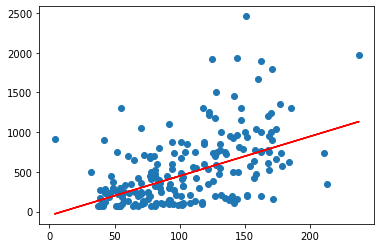

In [52]:
plt.scatter(X_train, y_train);
plt.plot(X_train, y_pred, color='r');

In [53]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


In [54]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

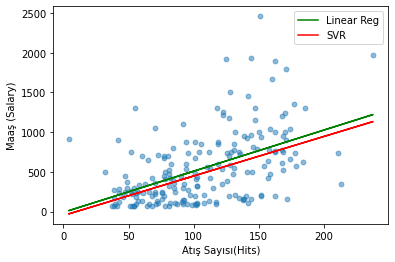

In [55]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g', label = 'Linear Reg')
plt.plot(X_train, y_pred, color='r', label = 'SVR')

plt.legend()
plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")
plt.show()

### Predict

In [56]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [57]:
svr_model.predict([[91]])

array([403.52804878])

In [58]:
y_pred = svr_model.predict(X_test)

In [59]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

### Model Tuning

In [60]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [61]:
svr_params = {'C': np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train, y_train)

In [62]:
pd.Series(svr_cv_model.best_params_)

C    0.1
dtype: float64

In [63]:
svr_tuned = SVR('linear', C = pd.Series(svr_cv_model.best_params_)).fit(X_train, y_train)

In [64]:
svr_tuned

SVR(C=C    0.1
dtype: float64, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='scale', kernel='linear', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)

In [65]:
y_pred = svr_tuned.predict(X_test)

In [66]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

In [67]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [68]:
svr_params = {'C': np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train, y_train)

In [69]:
svr_tuned = SVR('linear', C = pd.Series(svr_cv_model.best_params_)).fit(X_train, y_train)

In [70]:
y_pred = svr_tuned.predict(X_test)

In [71]:
np.sqrt(mean_squared_error(y_test, y_pred))

367.5385297249052

## Nonlinear SVR

In [72]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [73]:
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

eps = 0.1
svr = SVR('rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

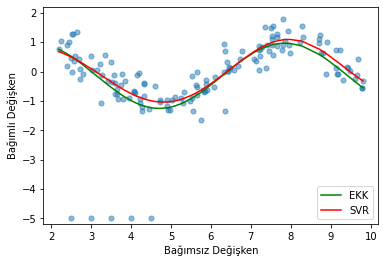

In [74]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

In [75]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [76]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

In [81]:
y_pred = svr_rbf.predict(X_test)

In [82]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

### Model Tuning

In [83]:
y_pred = svr_rbf

In [84]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [87]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [88]:
svr_tuned = SVR('rbf', 50).fit(X_train, y_train)

In [89]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849